In [4]:
"""PyAudio Example: Play a wave file."""

import pyaudio
import wave
import sys

CHUNK = 1024

FILE_NAME=""
#FILE_NAME="./black_saturn_plus_wait.wav"

wf = wave.open(FILE_NAME, 'rb')

# instantiate PyAudio (1)
p = pyaudio.PyAudio()

# open stream (2)
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

# read data
data = wf.readframes(CHUNK)

# play stream (3)
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)

# stop stream (4)
stream.stop_stream()
stream.close()

# close PyAudio (5)
p.terminate()

print("Audio terminated")

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
import time, numpy, pyaudio, fluidsynth

pa = pyaudio.PyAudio()
strm = pa.open(
    format = pyaudio.paInt16,
    channels = 2, 
    rate = 44100,
    output = True)

s = []
fl = fluidsynth.Synth()

# Initial silence is 1 second
s = numpy.append(s, fl.get_samples(44100 * 1))

# sfid = fl.sfload("synergi-8mb.sf2")
# sfid = fl.sfload("cadenza-lp.sf2")""
sfid = fl.sfload("Roland_SC-88.sf2")

fl.program_select(0, sfid, 0, 0)

fl.noteon(0, 60, 127)
fl.noteon(0, 67, 127)
fl.noteon(0, 76, 127)

# Chord is held for 2 seconds|
s = numpy.append(s, fl.get_samples(44100 * 2))

fl.noteoff(0, 60)
fl.noteoff(0, 67)
fl.noteoff(0, 76)

# Decay of chord is held for 1 second
s = numpy.append(s, fl.get_samples(44100 * 1))

# Add 1 sec of silence to end
s = numpy.append(s, fl.get_samples(44100 * 1))

fl.delete()

samps = fluidsynth.raw_audio_string(s)
print(len(samps))
print('Starting playback')
strm.write(samps)

print('Playback finished')

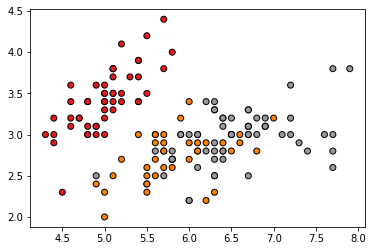

150
[  0.   0.   0. ...   1. -12.   0.]
Starting playback


In [53]:
import math, time, numpy, pyaudio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# setup audio stream
pa = pyaudio.PyAudio()
strm = pa.open(
    format = pyaudio.paInt16,
    channels = 2, 
    rate = 44100,
    output = True)

s = []
fl = fluidsynth.Synth()

# setup sample synth
# sfid = fl.sfload("synergi-8mb.sf2")
sfid = fl.sfload("cadenza-lp.sf2")
# sfid = fl.sfload("Roland_SC-88.sf2")
fl.program_select(0, sfid, 0, 0)

# Initial silence
seconds = 10
s = numpy.append(s, fl.get_samples(44100 * seconds))

# import some data to play with
iris = datasets.load_iris()

# select our features
X = iris.data[:, :2]
y = iris.target
xs = X[:, 0]
ys = X[:, 1]

# quick viz
plt.scatter(xs, ys, c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.show()

print(len(xs))
# sonify
for i in range(len(xs)):
    sampleFactor = 500 # scaling factor
    # feature one gives us the midi note
    noteIdx = int(xs[i] * 10)
    # feature 2 squared gives us the sample length
    samples = int(ys[i] ** 2 * sampleFactor)
    # play notedIdx for samples samples
    fl.noteon(0, noteIdx, 127)
    s = numpy.append(s, fl.get_samples(samples * 2))
    fl.noteoff(0, noteIdx)
    
# outro
s = numpy.append(s, fl.get_samples(44100 * 1))
# play out to stream
samps = fluidsynth.raw_audio_string(s)
print('Starting playback')
strm.write(samps)

In [71]:
import numpy, random, pyaudio, fluidsynth
from typing import List, NewType

random.seed(0)

synth = fluidsynth.Synth()

# initialize audio stream
pa = pyaudio.PyAudio()
strm = pa.open(
    format = pyaudio.paInt16,
    channels = 2, 
    rate = 44100,
    output = True)

# setup sample synth
# sfid = synth.sfload("cadenza-lp.sf2") # USE THIS ONE :)
sfid = synth.sfload("synergi-8mb.sf2")
synth.program_select(0, sfid, 0, 0)


def playNote(fl, el, beat, out=[]):
    synth.noteon(*el)
    out = numpy.append(out, fl.get_samples(int(random.random() * 8000) * 2))
    synth.noteoff(el[0], el[1])
    out = numpy.append(out, fl.get_samples(10000 * 1))
    return out

out = []
for i in range(100):
    note = int(random.random() * 100)
    out = playNote(synth, (0, note, 127), .25, out)

print('Starting playback...')
raw = fluidsynth.raw_audio_string(out)
synth.delete()
strm.write(raw)
print('...finished.')

Starting playback...
...finished.


In [84]:
import numpy, random, pyaudio, fluidsynth
from typing import List, NewType

random.seed(3)

synth = fluidsynth.Synth()

# initialize audio stream
pa = pyaudio.PyAudio()
strm = pa.open(
    format = pyaudio.paInt16,
    channels = 2, 
    rate = 44100,
    output = True)

# setup sample synth
# sfid = synth.sfload("cadenza-lp.sf2") # USE THIS ONE :)
sfid = synth.sfload("synergi-8mb.sf2")
synth.program_select(0, sfid, 0, 0)


def playChord(fl, els, beat, out=[]):
    samples = random.randint(1400, 10000)
    for el in els:
        synth.noteon(*el)
    out = numpy.append(out, synth.get_samples(samples * 2))
    for el in els:
        synth.noteoff(el[0], el[1])
    out = numpy.append(out, synth.get_samples(500 * 1))
    return out

out = []

for i in range(240):
    chord_length =  random.randint(0, 10)
    chord = [(0, int(random.random() * 100), random.randint(60, 120)) for _ in range(chord_length)]
    out = playChord(synth, chord, .25, out)
out = numpy.append(out, synth.get_samples(44000 * 1))

print('Starting playback...')
raw = fluidsynth.raw_audio_string(out)
synth.delete()
strm.write(raw)
print('...finished.')

Starting playback...
...finished.
